### Import all the packages we need

In [1]:
import refinitiv.data.eikon as ek
import talib
import pandas_ta as pta
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplfinance as mpf
import datetime as dt
import numpy as np
from sklearn.svm import SVC
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
plt.style.use("dark_background")
mpl.style.use("dark_background")
ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')

### Get our data - one Line API call - if you can build excel formula - you can build this

In [2]:
df1= ek.get_timeseries('GBP=',fields=['OPEN','HIGH','LOW','CLOSE','COUNT'],start_date='01-10-2022',
                       end_date='06-30-2022',interval='hour',corax='adjusted')

df1.columns=['open','high','low','close','volume']
df1

,open,high,low,close,volume
Date,,,,,
2022-01-10 00:00:00,1.3583,1.3592,1.358,1.3591,2160
2022-01-10 01:00:00,1.3591,1.3597,1.3587,1.3594,1865
2022-01-10 02:00:00,1.3594,1.3595,1.3588,1.3594,3048
2022-01-10 03:00:00,1.3593,1.3596,1.3584,1.3585,2098
2022-01-10 04:00:00,1.3585,1.3586,1.358,1.3583,2199
...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461


In [3]:
df1.dropna(how="any", inplace=True)
len(df1)

3046

### Pandas TA package is very useful tool to create various technical analysis features with ease

In [4]:
df1.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

### Lets see how easy it is to create some Bollinger Bands

In [5]:
df2 = df1.copy()
df2.ta.bbands(length=50, std=2, mamode="sma", ddof=0, append=True)
df2

,open,high,low,close,volume,BBL_50_2.0,BBM_50_2.0,BBU_50_2.0,BBB_50_2.0,BBP_50_2.0
Date,,,,,,,,,,
2022-01-10 00:00:00,1.3583,1.3592,1.358,1.3591,2160,NaN,NaN,NaN,NaN,NaN
2022-01-10 01:00:00,1.3591,1.3597,1.3587,1.3594,1865,NaN,NaN,NaN,NaN,NaN
2022-01-10 02:00:00,1.3594,1.3595,1.3588,1.3594,3048,NaN,NaN,NaN,NaN,NaN
2022-01-10 03:00:00,1.3593,1.3596,1.3584,1.3585,2098,NaN,NaN,NaN,NaN,NaN
2022-01-10 04:00:00,1.3585,1.3586,1.358,1.3583,2199,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931,1.210360,1.220602,1.230844,1.678200,0.055656
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954,1.210004,1.220304,1.230604,1.688177,0.121181
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461,1.209617,1.220018,1.230419,1.705078,0.119368


<AxesSubplot:xlabel='Date'>

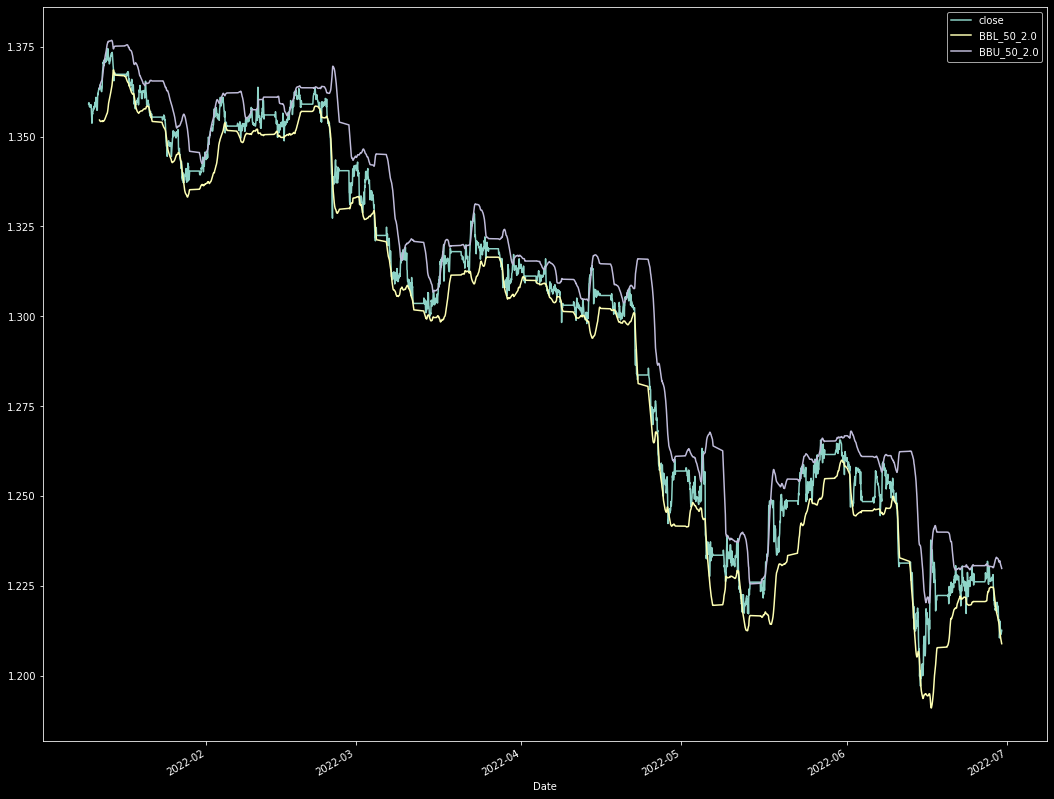

In [6]:
df2[['close','BBL_50_2.0','BBU_50_2.0']].plot(figsize=(18,15))

### Candlestick pattern recognition - 60 or so candlestick patterns are recognised where bullish structures are positive numbers and bearish structures are negative numbers

In [7]:
df3 = df1.copy()
df3.ta.cdl_pattern(name="all",append=True)
df3

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-10 00:00:00,1.3583,1.3592,1.358,1.3591,2160,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 01:00:00,1.3591,1.3597,1.3587,1.3594,1865,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 02:00:00,1.3594,1.3595,1.3588,1.3594,3048,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 03:00:00,1.3593,1.3596,1.3584,1.3585,2098,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 04:00:00,1.3585,1.3586,1.358,1.3583,2199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,1.2118,1.2124,1.2111,1.2115,3931,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-29 21:00:00,1.2117,1.2125,1.2111,1.2125,1954,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-29 22:00:00,1.2125,1.2126,1.2116,1.2121,461,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df3.describe()

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.0,3046.0,3046.000000,3046.000000,3046.000000,...,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.0,3046.000000
mean,1.296923,1.297999,1.295750,1.296862,4468.169731,0.0,0.0,0.032830,0.164150,-0.459619,...,3.512804,-0.196980,0.032830,1.543007,-0.032830,-0.032830,-0.098490,0.032830,0.0,-0.065660
std,0.049219,0.049025,0.049380,0.049233,1955.033036,0.0,0.0,9.060945,4.048877,16.403738,...,51.168330,4.434594,1.811903,12.327601,1.811903,1.811903,4.051007,1.811903,0.0,5.730306
min,1.197000,1.198900,1.193200,1.197200,1.000000,0.0,0.0,-100.000000,0.000000,-100.000000,...,-100.000000,-100.000000,0.000000,0.000000,-100.000000,-100.000000,-100.000000,0.000000,0.0,-100.000000
25%,1.251425,1.252825,1.249900,1.251400,3297.250000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.307000,1.307800,1.306000,1.306950,4533.500000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.343275,1.344100,1.341975,1.343175,5681.500000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.374500,1.374800,1.373100,1.374400,11741.000000,0.0,0.0,100.000000,100.000000,100.000000,...,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.0,100.000000


### Lets use Matplotlib Finance package to create some candlestick charts with ease

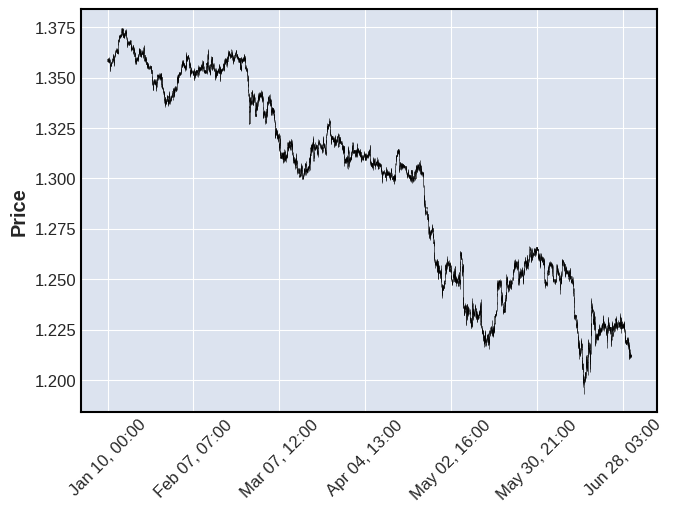

In [9]:
df3 = df3.astype(float)
mpf.plot(df3, type='candle')

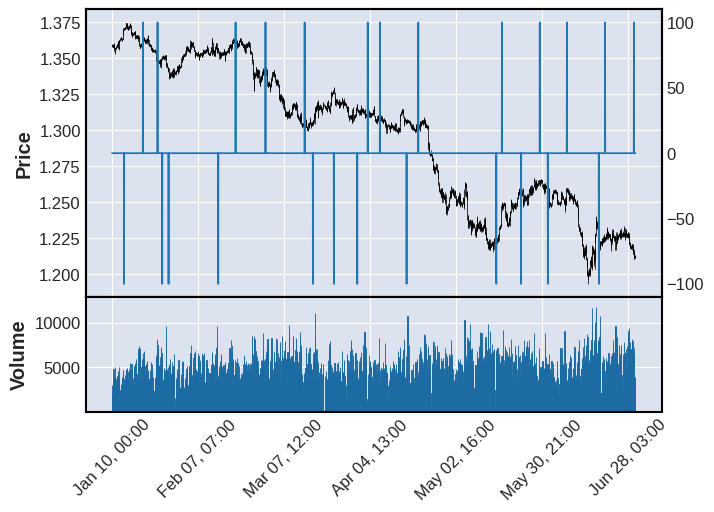

In [10]:
apdict = mpf.make_addplot(df3['CDL_3INSIDE'])
mpf.plot(df3,volume=True,addplot=apdict)

### Implement backtesting of a strategy using BackTrader package

In [11]:
df4 = df1.copy()

### Set up a simple SMA crossover strategy using built-in strategy

In [12]:
class smaCross(bt.Strategy):
  # list of parameters which are configurable for the strategy
    params = dict(
        pfast=50,  # period for the fast moving average
        pslow=100   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal
  
    def next(self):
        if not self.position and self.crossover > 0:  # not in the market
            self.buy()
        elif self.position and self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

<IPython.core.display.Javascript object>

[[<Figure size 3600x3200 with 5 Axes>]]

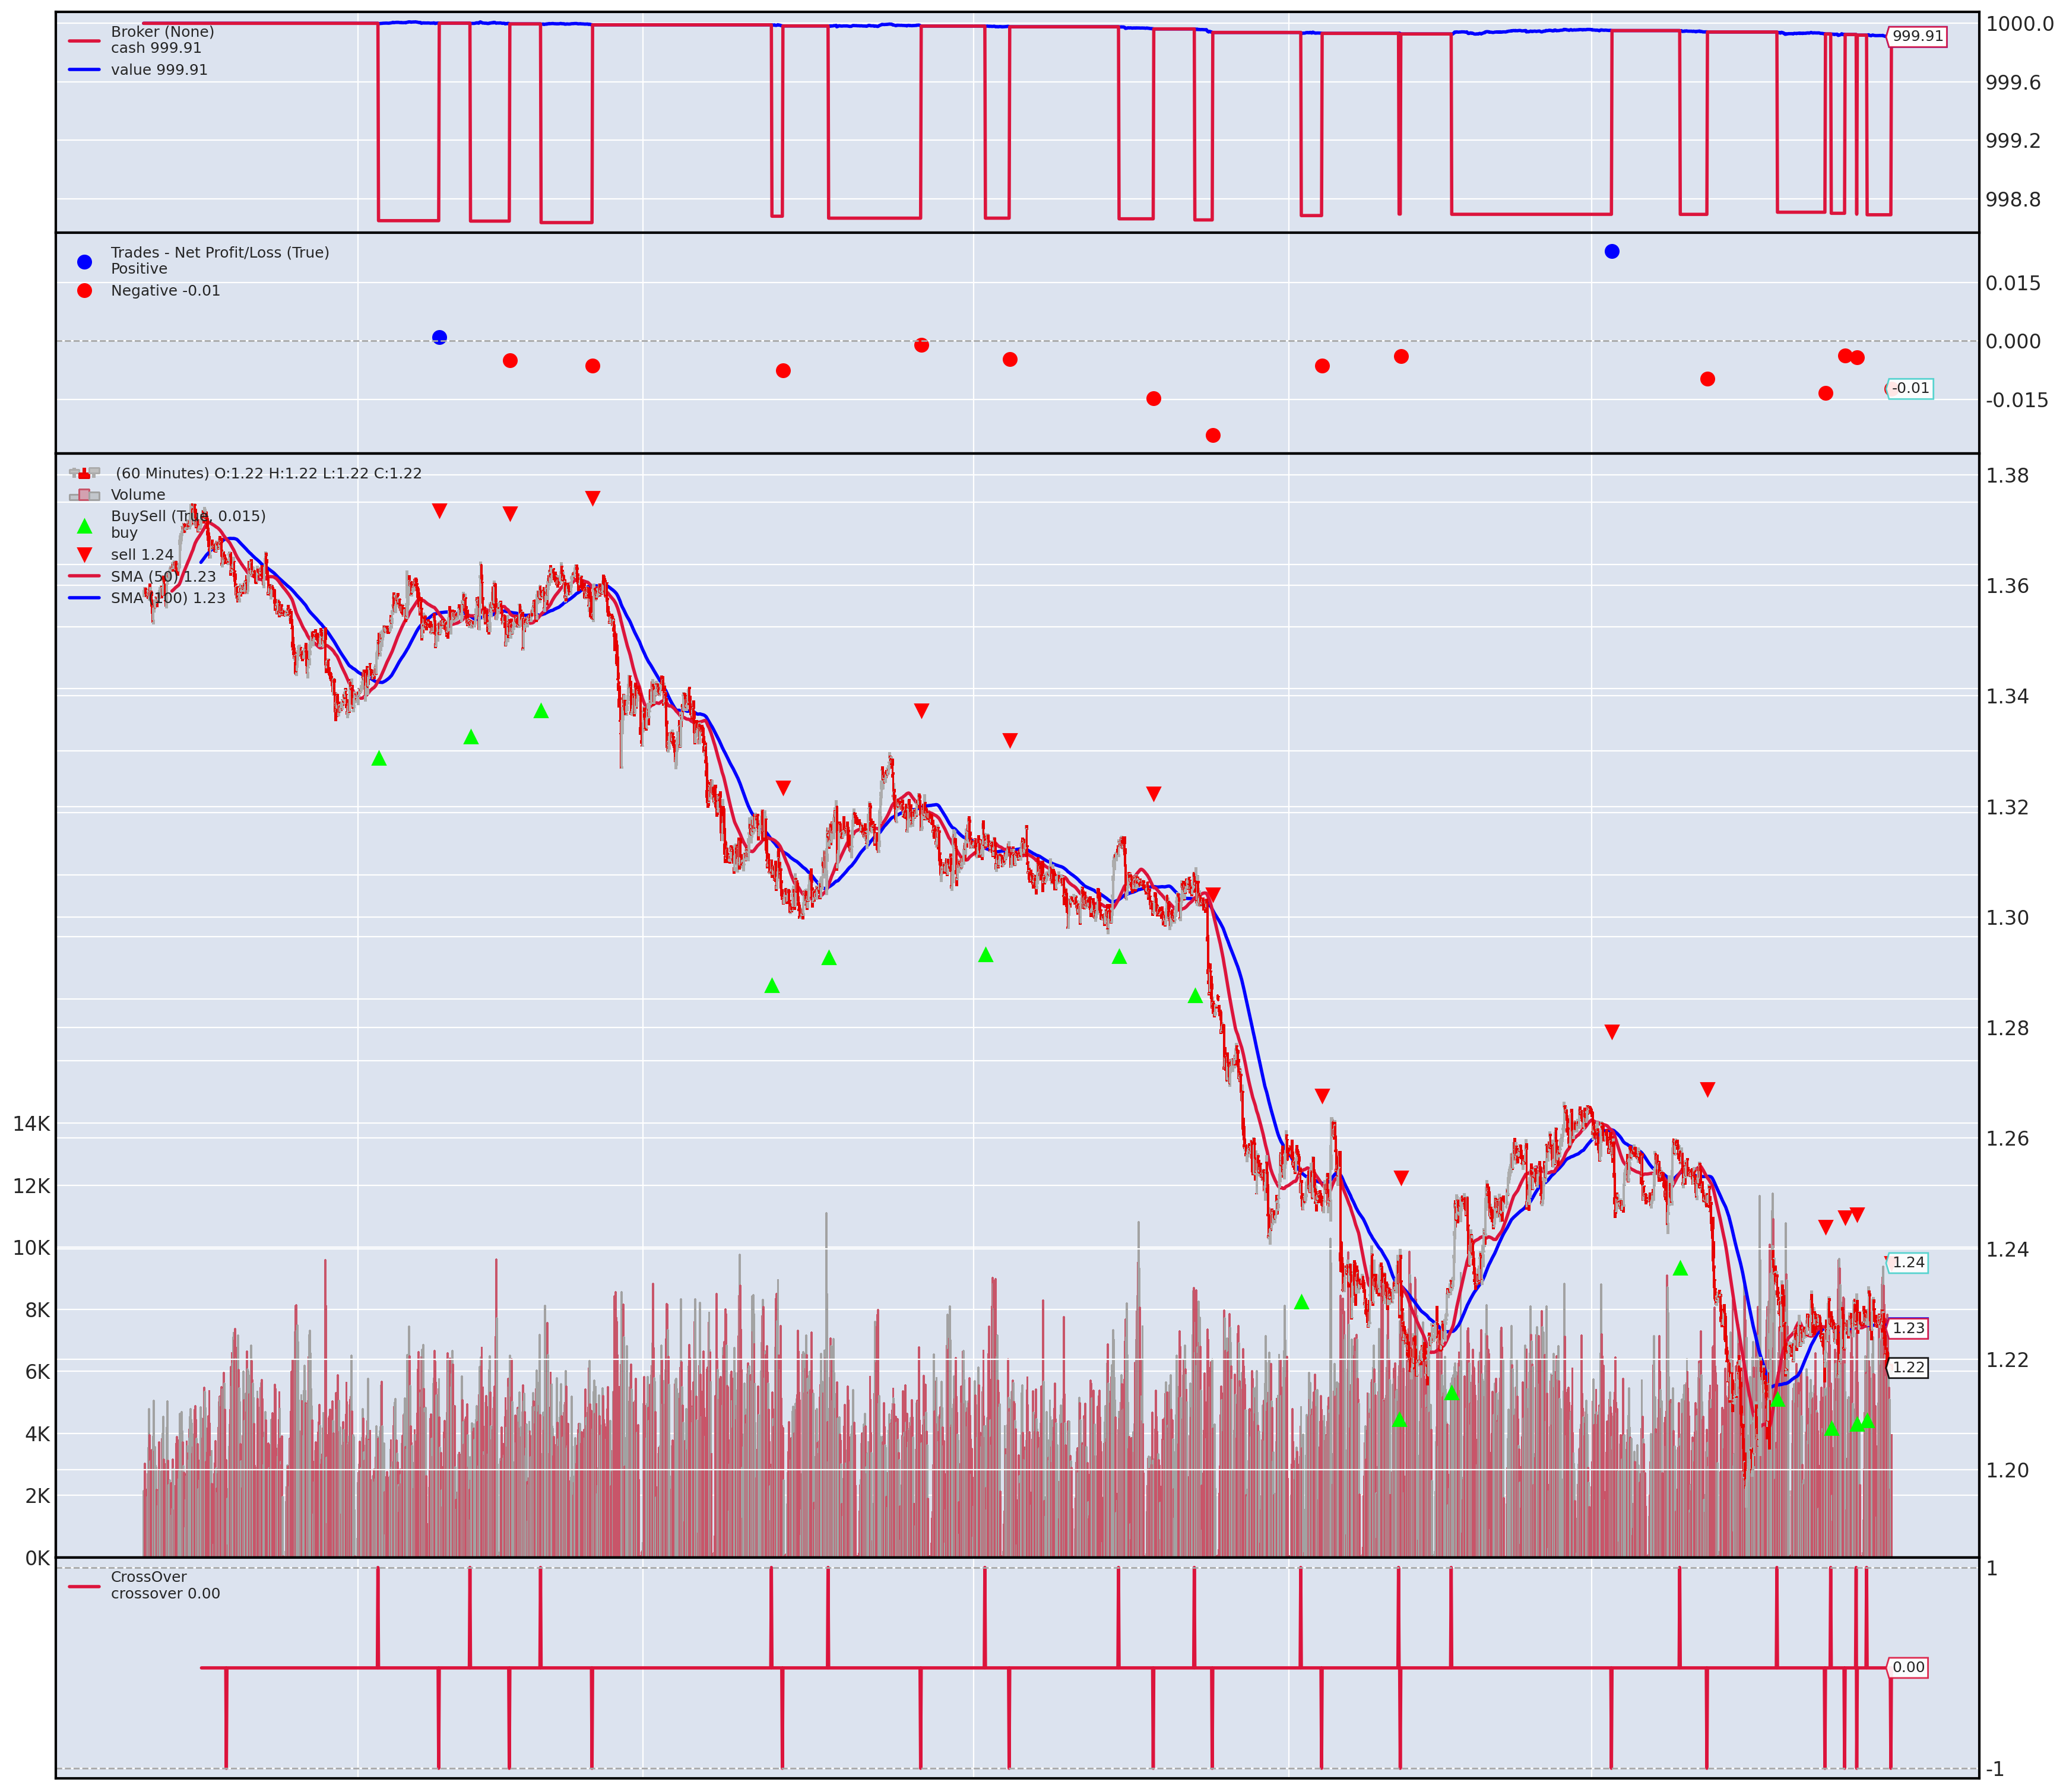

In [13]:
# initialize backtrader broker
cerebro = bt.Cerebro(stdstats=True)
cerebro.broker.setcash(1000)
cerebro.broker.setcommission(commission=0.001)

# add strategy
cerebro.addstrategy(smaCross)

# wire up bt.feeds.PandasData to df4, set timeperiod, timeframe and also compression
data = bt.feeds.PandasData(dataname=df4,fromdate=dt.datetime(2022, 1, 10),todate=dt.datetime(2022, 6, 29),
                           timeframe=bt.TimeFrame.Minutes,compression=60) 
cerebro.adddata(data)

# run backtest
res = cerebro.run()
strat = res[0]

#prepare plots
mpl.rcParams['font.sans-serif']=['DejaVu Sans']
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.figsize']=[18, 16]
mpl.rcParams['figure.dpi']=200
mpl.rcParams['figure.facecolor']='w'
mpl.rcParams['figure.edgecolor']='k'
cerebro.plot(style='candle',iplot=True,width=30,height=30,start=dt.datetime(2022, 1, 10), end=dt.datetime(2022, 6, 29))

## Simple Pattern Recognition using Machine Learning Algorithm (by Dr. Yves Hilpisch of tpq.io)

### - Generate AI strategy using pattern recognition of lagged returns data
### - Simple example - note lagged returns are correlated - usually features should not be correlated
### - First lets create a new dataframe for 3 RICs

In [14]:
rics = ['QQQ.O','AMZN.O','AAPL.O'] 
ts = pd.DataFrame()
for ric in rics:
    ts[ric] = ek.get_timeseries(ric,fields='CLOSE', start_date='01-10-2022',end_date='06-30-2022', 
                                interval='hour',corax='adjusted')['CLOSE']

ts

,QQQ.O,AMZN.O,AAPL.O
Date,,,
2022-01-10 10:00:00,379.63,162.9,172.45
2022-01-10 11:00:00,378.8,162.3665,171.75
2022-01-10 12:00:00,378.6,162.28,171.66
2022-01-10 13:00:00,374.64,160.25,170.0
2022-01-10 14:00:00,375.01,160.525,169.23
...,...,...,...
2022-06-29 20:00:00,283.87,108.89,139.25
2022-06-29 21:00:00,283.92,108.86,139.205
2022-06-29 22:00:00,283.89,108.825,139.08


### Create a returns series - should be stationary - check using Augmented Dickey-Fuller test

In [15]:
rets = np.log(ts / ts.shift(1)).dropna()
rets.head()

,QQQ.O,AMZN.O,AAPL.O
Date,,,
2022-01-10 11:00:00,-0.002189,-0.00328,-0.004067
2022-01-10 12:00:00,-0.000528,-0.000533,-0.000524
2022-01-10 13:00:00,-0.010515,-0.012588,-0.009717
2022-01-10 14:00:00,0.000987,0.001715,-0.00454
2022-01-10 15:00:00,-0.008328,-0.017723,0.001476


In [16]:
adfuller(ts['QQQ.O'])

(-1.1652509278146859,
 0.688362492273088,
 3,
 1884,
 {'1%': -3.433825707083533,
  '5%': -2.8630753283581076,
  '10%': -2.567587351898432},
 7468.9450400183305)

In [17]:
adfuller(rets['QQQ.O']) 

(-26.43019890463245,
 0.0,
 2,
 1884,
 {'1%': -3.433825707083533,
  '5%': -2.8630753283581076,
  '10%': -2.567587351898432},
 -14030.373322872454)

### Create lagged data function

In [18]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)  # defines the column name
        # creates the lagged data column with directional values
        df[col] = df[ric].shift(lag)
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

### For each of our Instruments, create lagged data frame with 20 lags 

In [19]:
lags = 20
dfs = {}
for ric in rics:
    df, cols = add_lags(rets, ric, lags)
    dfs[ric] = df

In [20]:
dfs['AAPL.O']

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-11 15:00:00,-0.005348,-0.003357,-0.003,-0.002302,0.001265,0.004846,0.001273,0.000985,0.000348,0.001625,...,-0.00275,0.008907,0.003325,0.002206,-0.004516,0.001476,-0.00454,-0.009717,-0.000524,-0.004067
2022-01-11 16:00:00,-0.000117,-0.005348,-0.003357,-0.003,-0.002302,0.001265,0.004846,0.001273,0.000985,0.000348,...,0.008691,-0.00275,0.008907,0.003325,0.002206,-0.004516,0.001476,-0.00454,-0.009717,-0.000524
2022-01-11 17:00:00,0.019026,-0.000117,-0.005348,-0.003357,-0.003,-0.002302,0.001265,0.004846,0.001273,0.000985,...,0.001625,0.008691,-0.00275,0.008907,0.003325,0.002206,-0.004516,0.001476,-0.00454,-0.009717
2022-01-11 18:00:00,-0.003295,0.019026,-0.000117,-0.005348,-0.003357,-0.003,-0.002302,0.001265,0.004846,0.001273,...,0.000348,0.001625,0.008691,-0.00275,0.008907,0.003325,0.002206,-0.004516,0.001476,-0.00454
2022-01-11 19:00:00,0.001291,-0.003295,0.019026,-0.000117,-0.005348,-0.003357,-0.003,-0.002302,0.001265,0.004846,...,0.000985,0.000348,0.001625,0.008691,-0.00275,0.008907,0.003325,0.002206,-0.004516,0.001476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,0.000575,-0.003371,0.003695,-0.00627,-0.0005,0.003863,0.016001,-0.002146,0.003348,0.001824,...,-0.001962,0.001126,0.001055,-0.000146,0.000002,-0.004032,-0.00587,-0.003533,0.001788,-0.012399
2022-06-29 21:00:00,-0.000323,0.000575,-0.003371,0.003695,-0.00627,-0.0005,0.003863,0.016001,-0.002146,0.003348,...,-0.004082,-0.001962,0.001126,0.001055,-0.000146,0.000002,-0.004032,-0.00587,-0.003533,0.001788
2022-06-29 22:00:00,-0.000898,-0.000323,0.000575,-0.003371,0.003695,-0.00627,-0.0005,0.003863,0.016001,-0.002146,...,0.001824,-0.004082,-0.001962,0.001126,0.001055,-0.000146,0.000002,-0.004032,-0.00587,-0.003533


### Transform lagged returns data into upward moves (+1) or downward moves (-1) 

In [21]:
np.sign(dfs['AAPL.O'])

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-11 15:00:00,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2022-01-11 16:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2022-01-11 17:00:00,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
2022-01-11 18:00:00,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
2022-01-11 19:00:00,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2022-06-29 21:00:00,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
2022-06-29 22:00:00,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0


### Even with this 20 lagged sample - over 1 Mill combinations for each row!

In [22]:
2 ** lags #potential number of combinations

1048576

In [23]:
from sklearn.svm import SVC
for ric in rics:
    model = SVC(C=100) # the ML model
    df = dfs[ric].copy()  # getting data for the RIC
    model.fit(np.sign(df[cols]), np.sign(df[ric].astype(float))) #fir model on features and labels
    dfs[ric]['position'] = model.predict(np.sign(df[cols]))  # label prediction

In [24]:
for ric in rics:
    print('{:10} | {}'.format(ric, dfs[ric]['position'].values[:10]))

QQQ.O      | [-1.  1.  1. -1.  1.  1.  1. -1. -1. -1.]
AMZN.O     | [ 1.  1.  1. -1. -1. -1.  1. -1. -1.  1.]
AAPL.O     | [-1. -1.  1. -1.  1.  1.  1.  1. -1.  1.]


In [25]:
for ric in rics:
    dfs[ric]['strategy'] = dfs[ric]['position'] * dfs[ric][ric]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

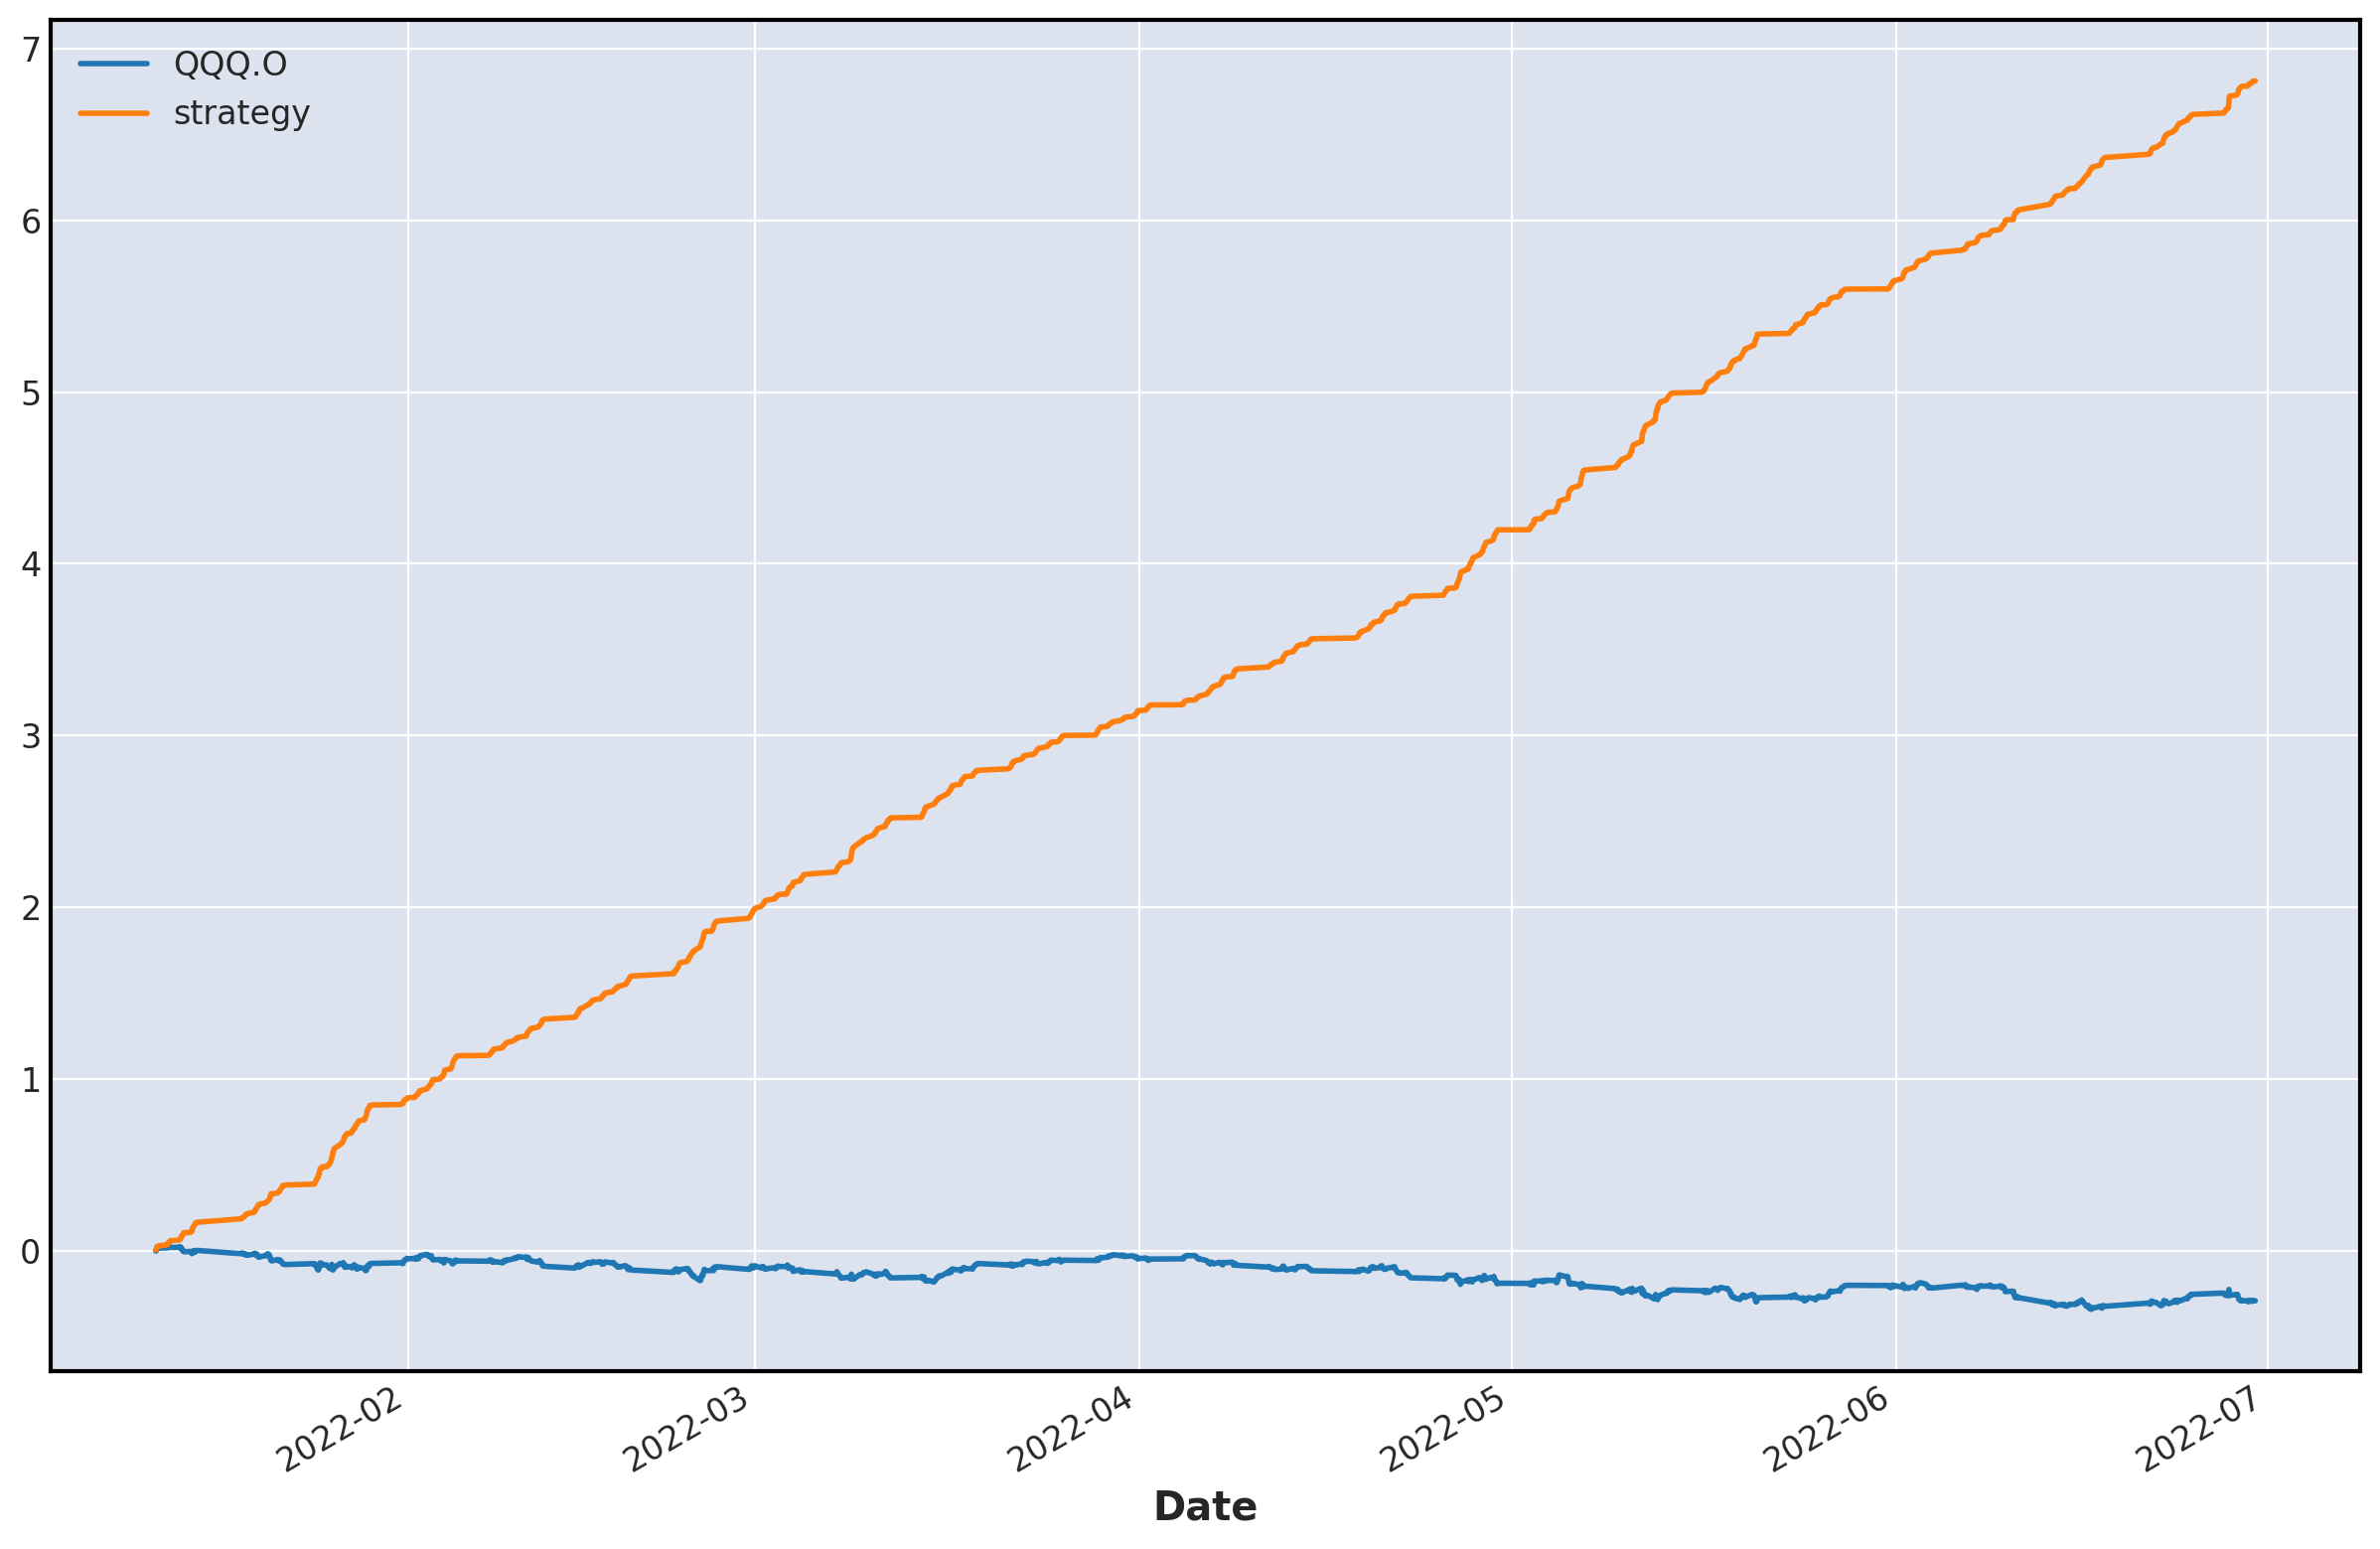

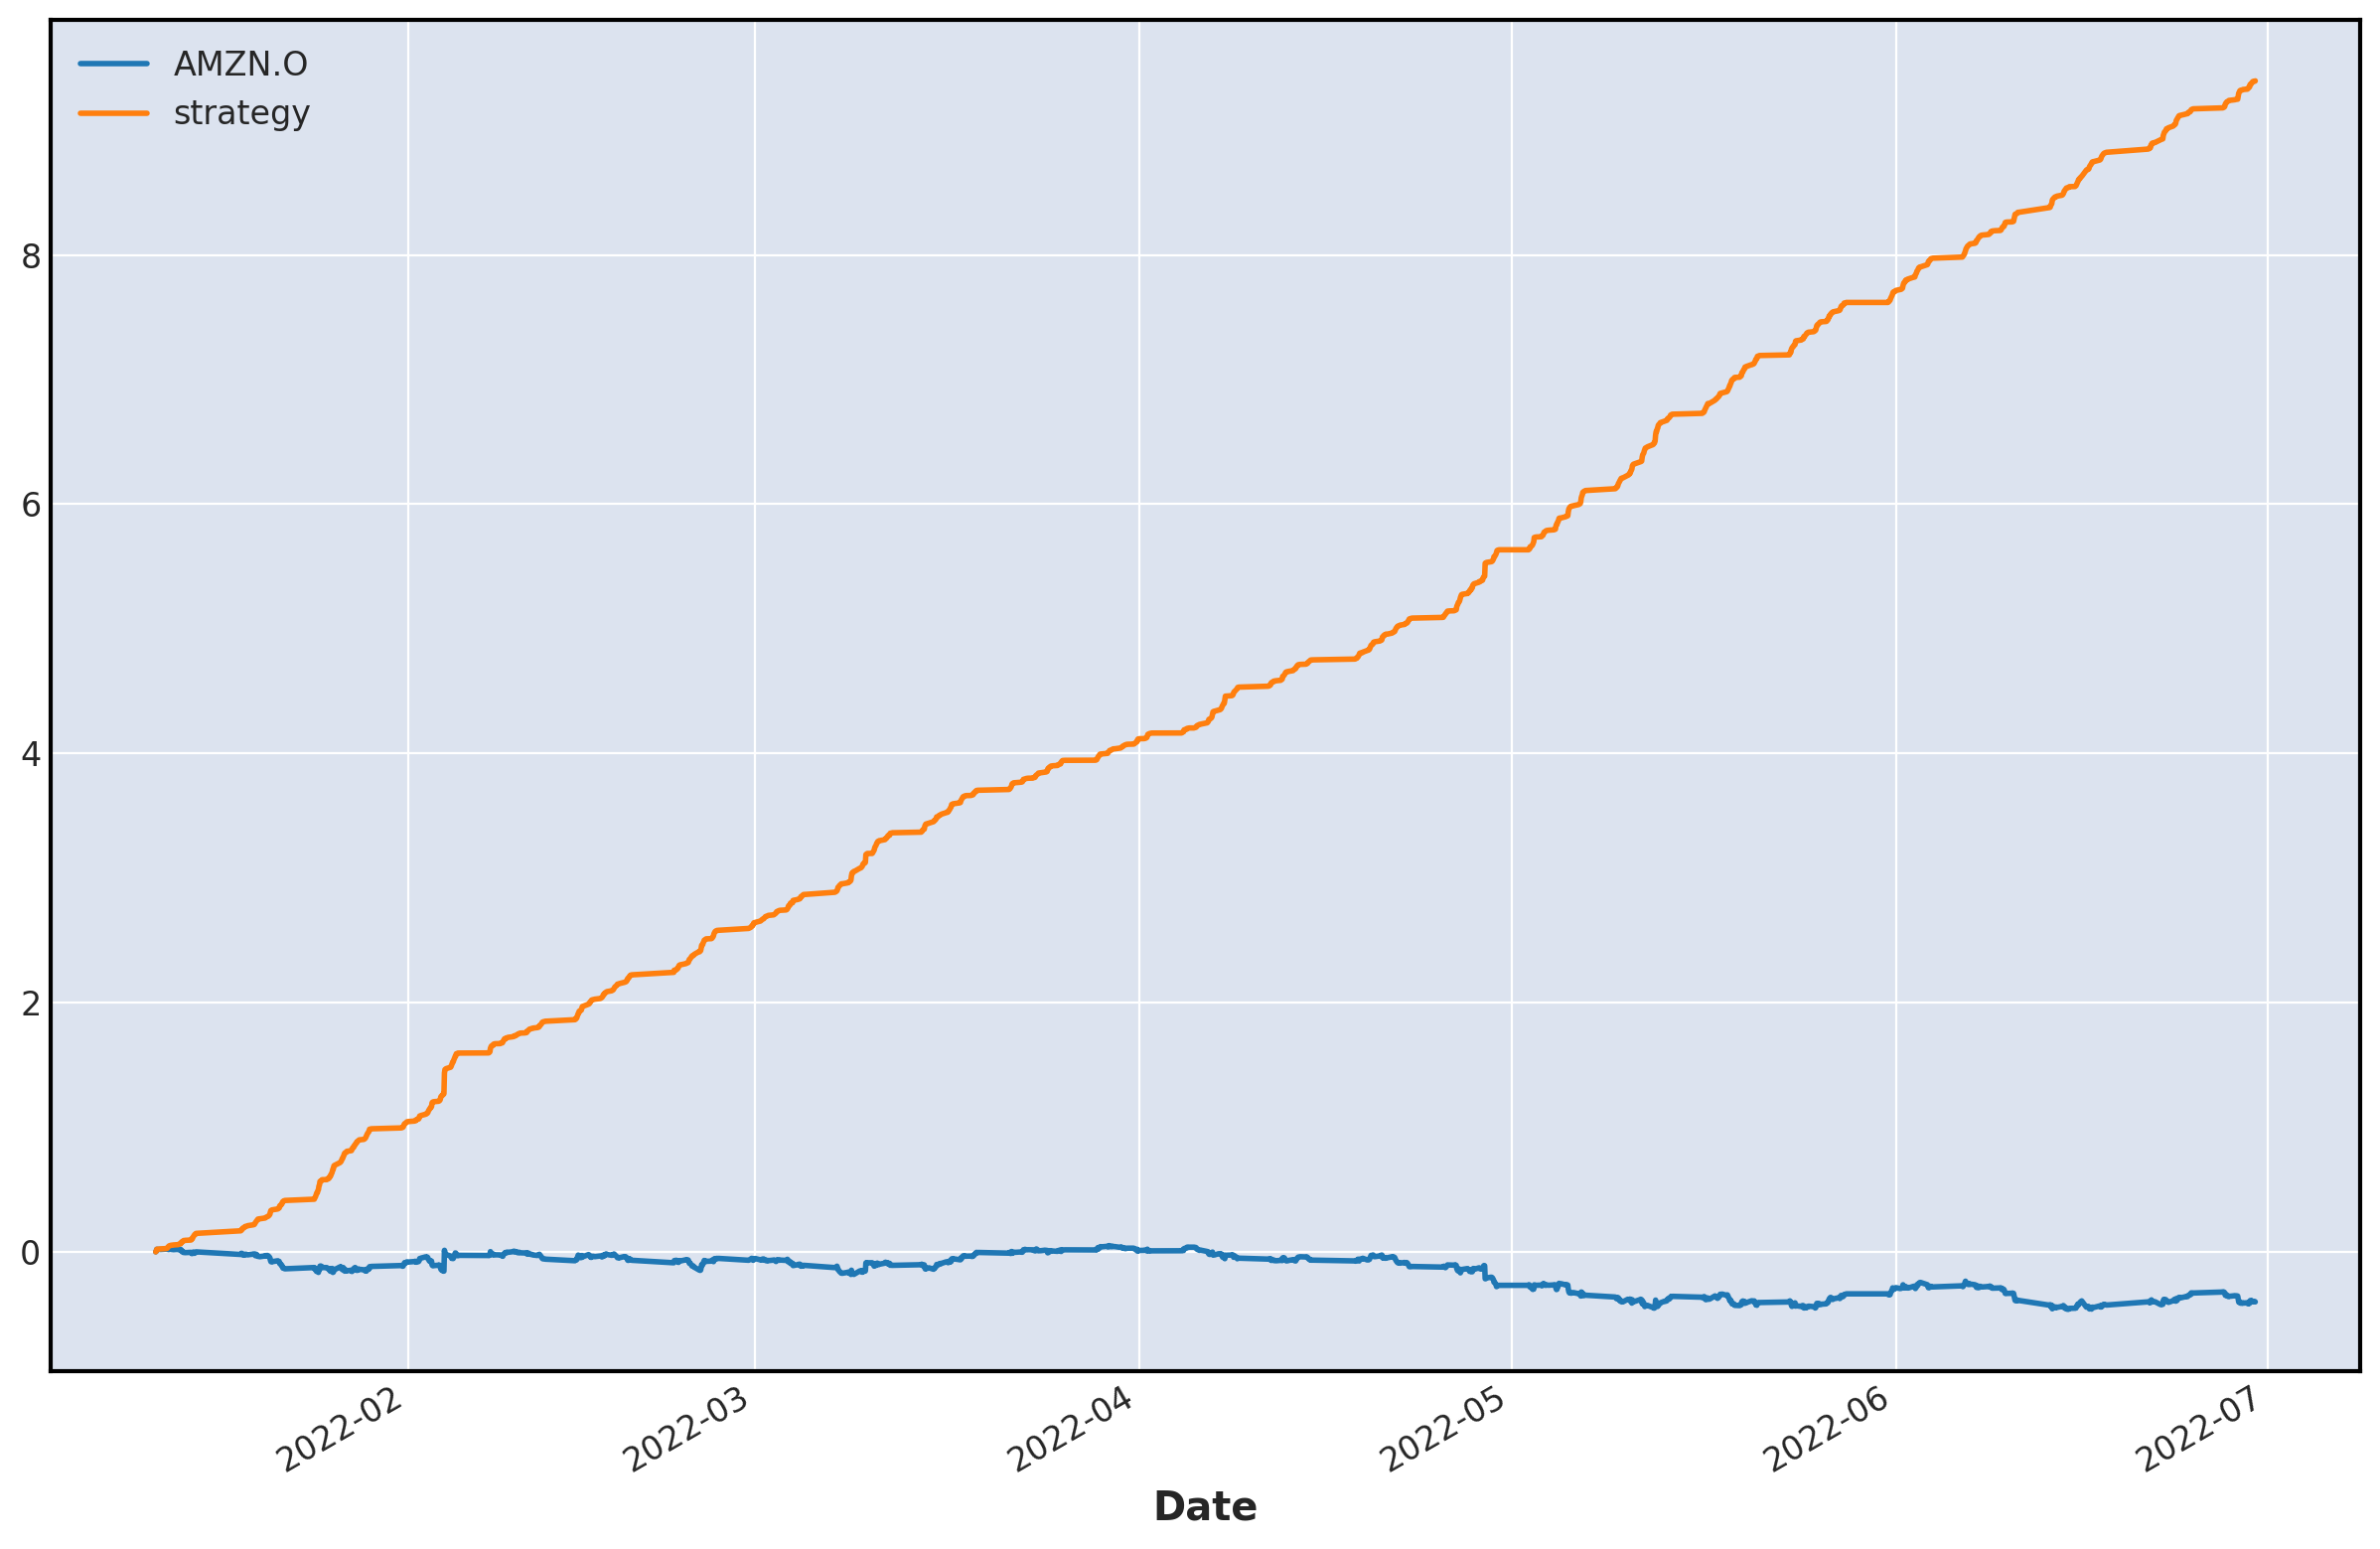

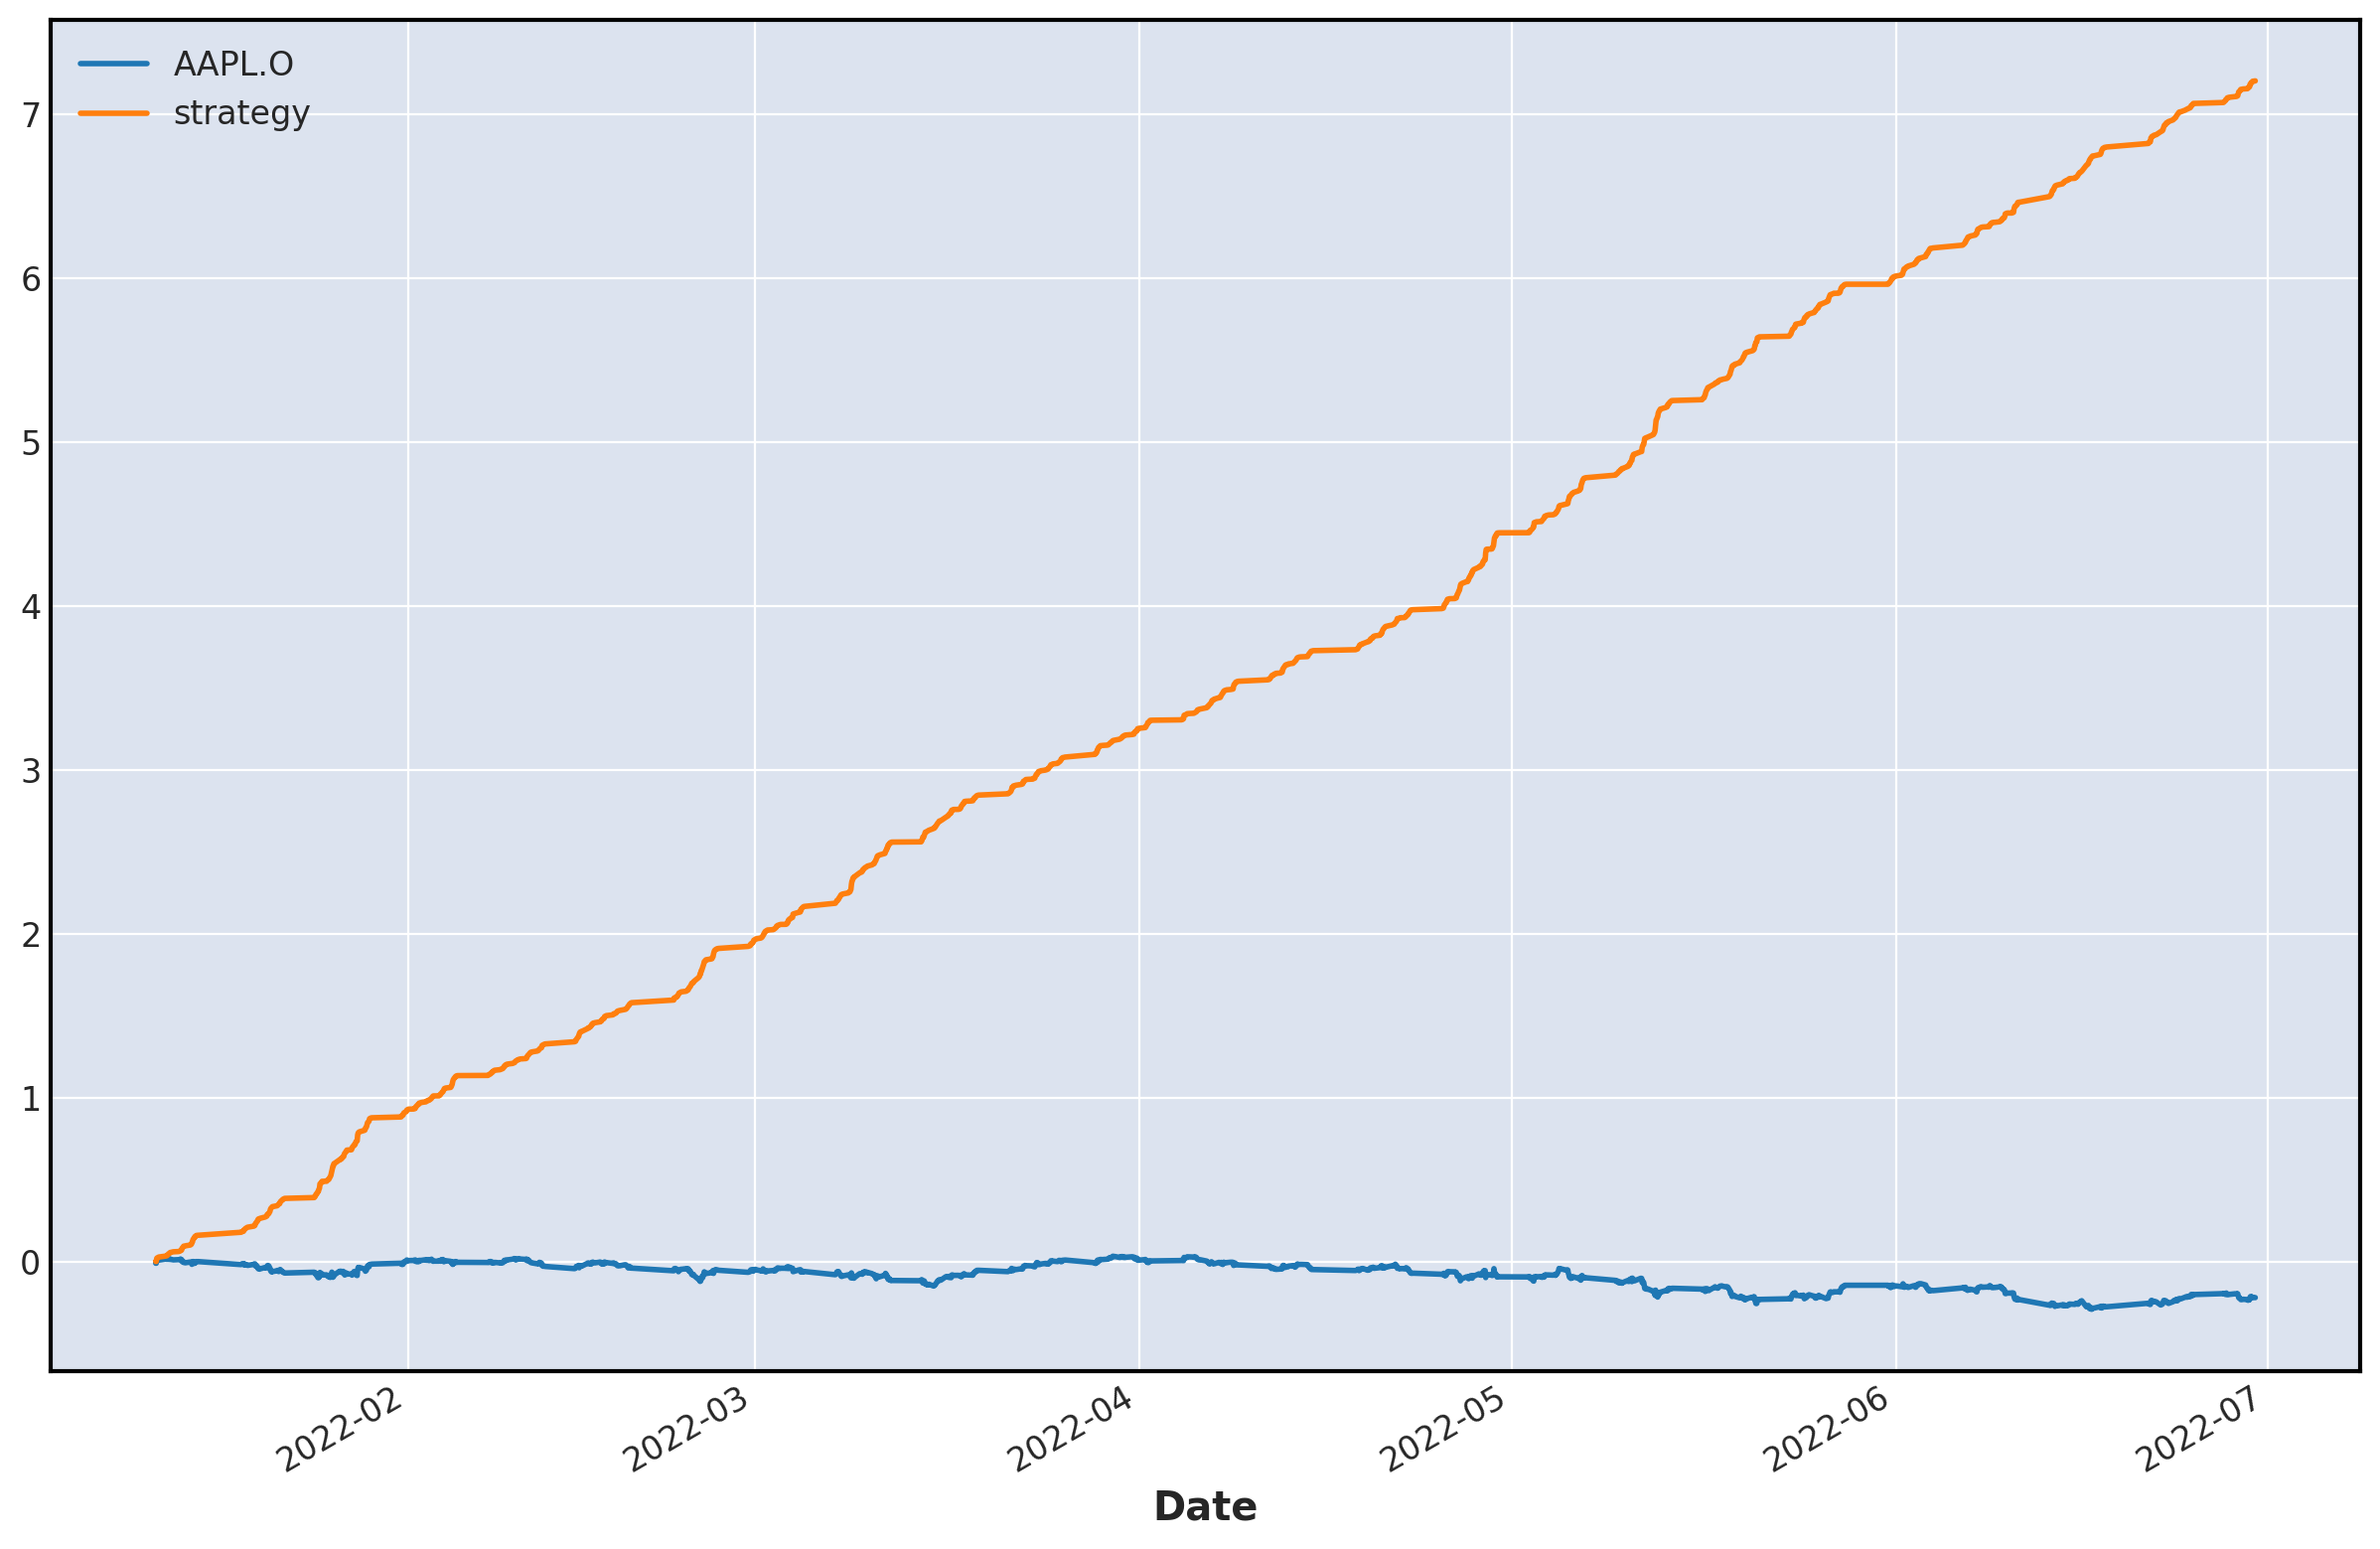

In [26]:
for ric in rics:
    dfs[ric][[ric, 'strategy']].astype(float).cumsum().plot(figsize=(15,10)) #.apply(np.exp)

### More sensible approach splits data into train and test sets - here we use 50% - 50% split

In [27]:
res = {}
for ric in rics:
    model = SVC(C=100) # the ML model
    df = dfs[ric].copy()  # getting data for the RIC
    split = int(len(df) / 2)
    train_x = np.sign(df[cols]).iloc[:split]
    train_y = np.sign(df[ric]).iloc[:split]
    test_x = np.sign(df[cols]).iloc[split:]
    test_y = df[ric].iloc[split:]
    model.fit(train_x, train_y.astype(float))  # model fitting
    pred = model.predict(test_x)  # prediction
    strat = pred * test_y
    res[ric] = pd.DataFrame({ric: test_y,
                             'pred': pred,
                             'strategy': strat})

In [28]:
res['AAPL.O'].head()

,AAPL.O,pred,strategy
Date,,,
2022-04-05 19:00:00,-0.001113,1.0,-0.001113
2022-04-05 20:00:00,-0.000086,1.0,-0.000086
2022-04-05 21:00:00,0.001456,1.0,0.001456
2022-04-05 22:00:00,-0.000599,-1.0,0.000599
2022-04-05 23:00:00,-0.000457,1.0,-0.000457


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

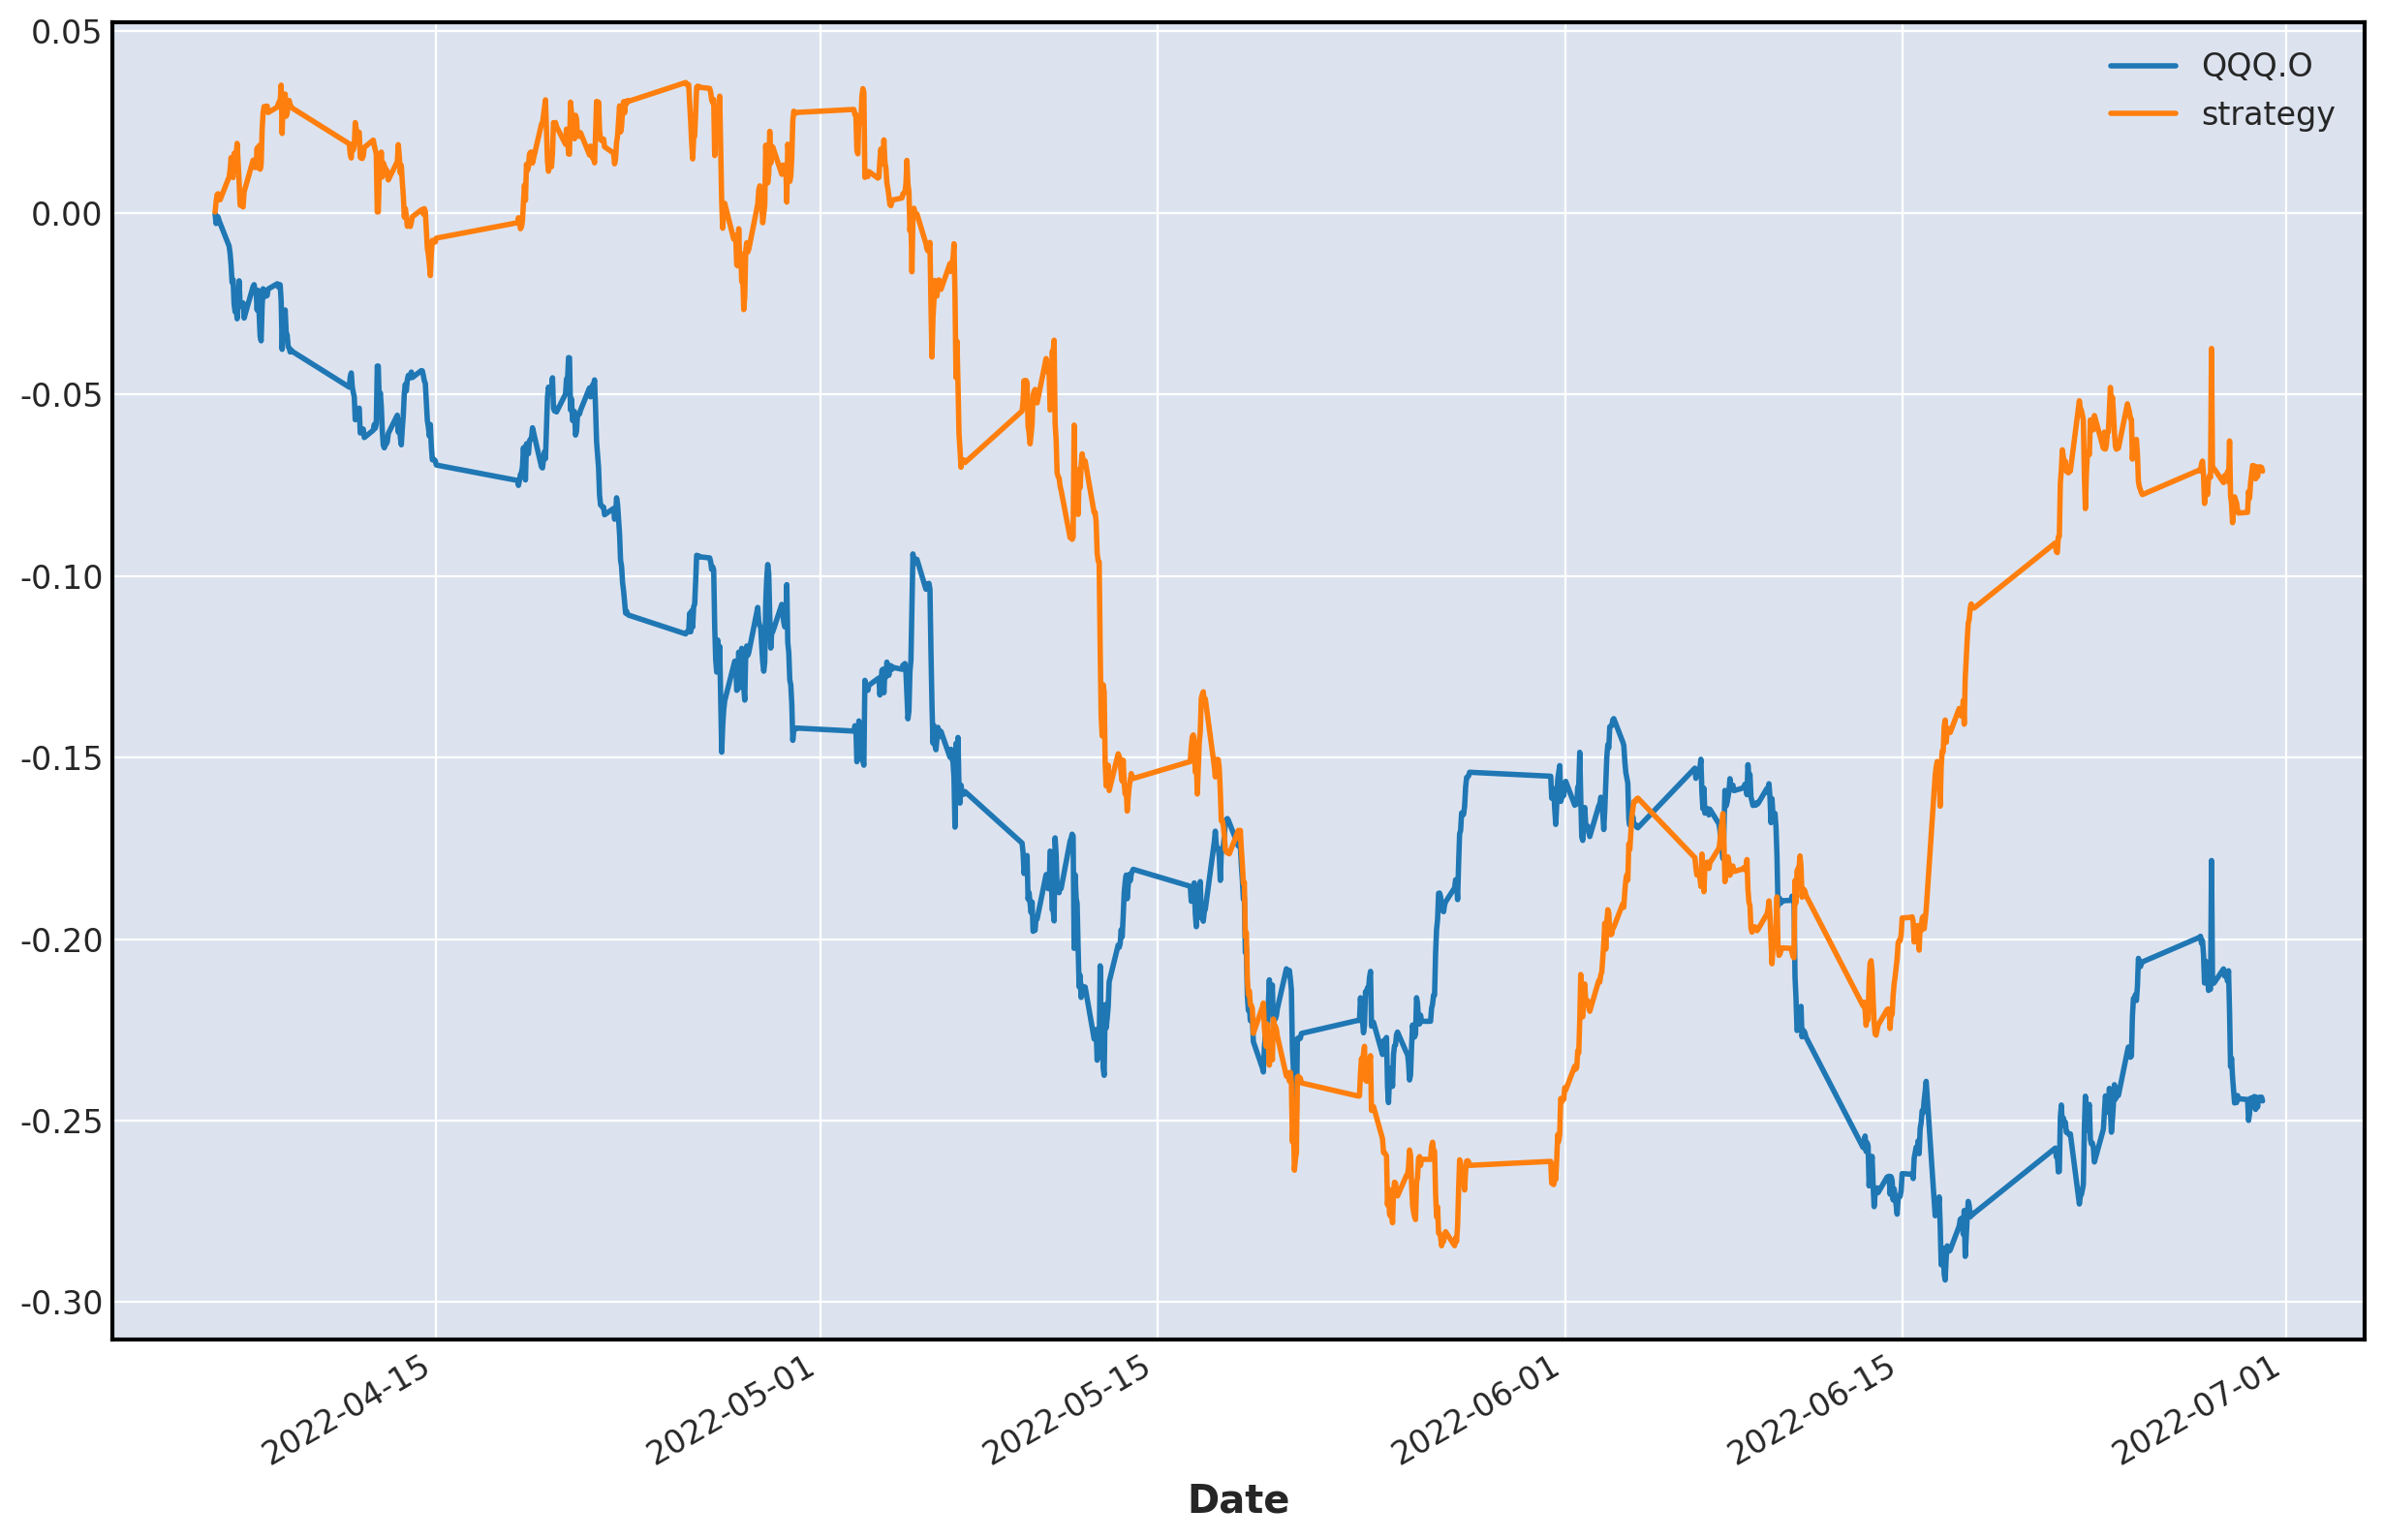

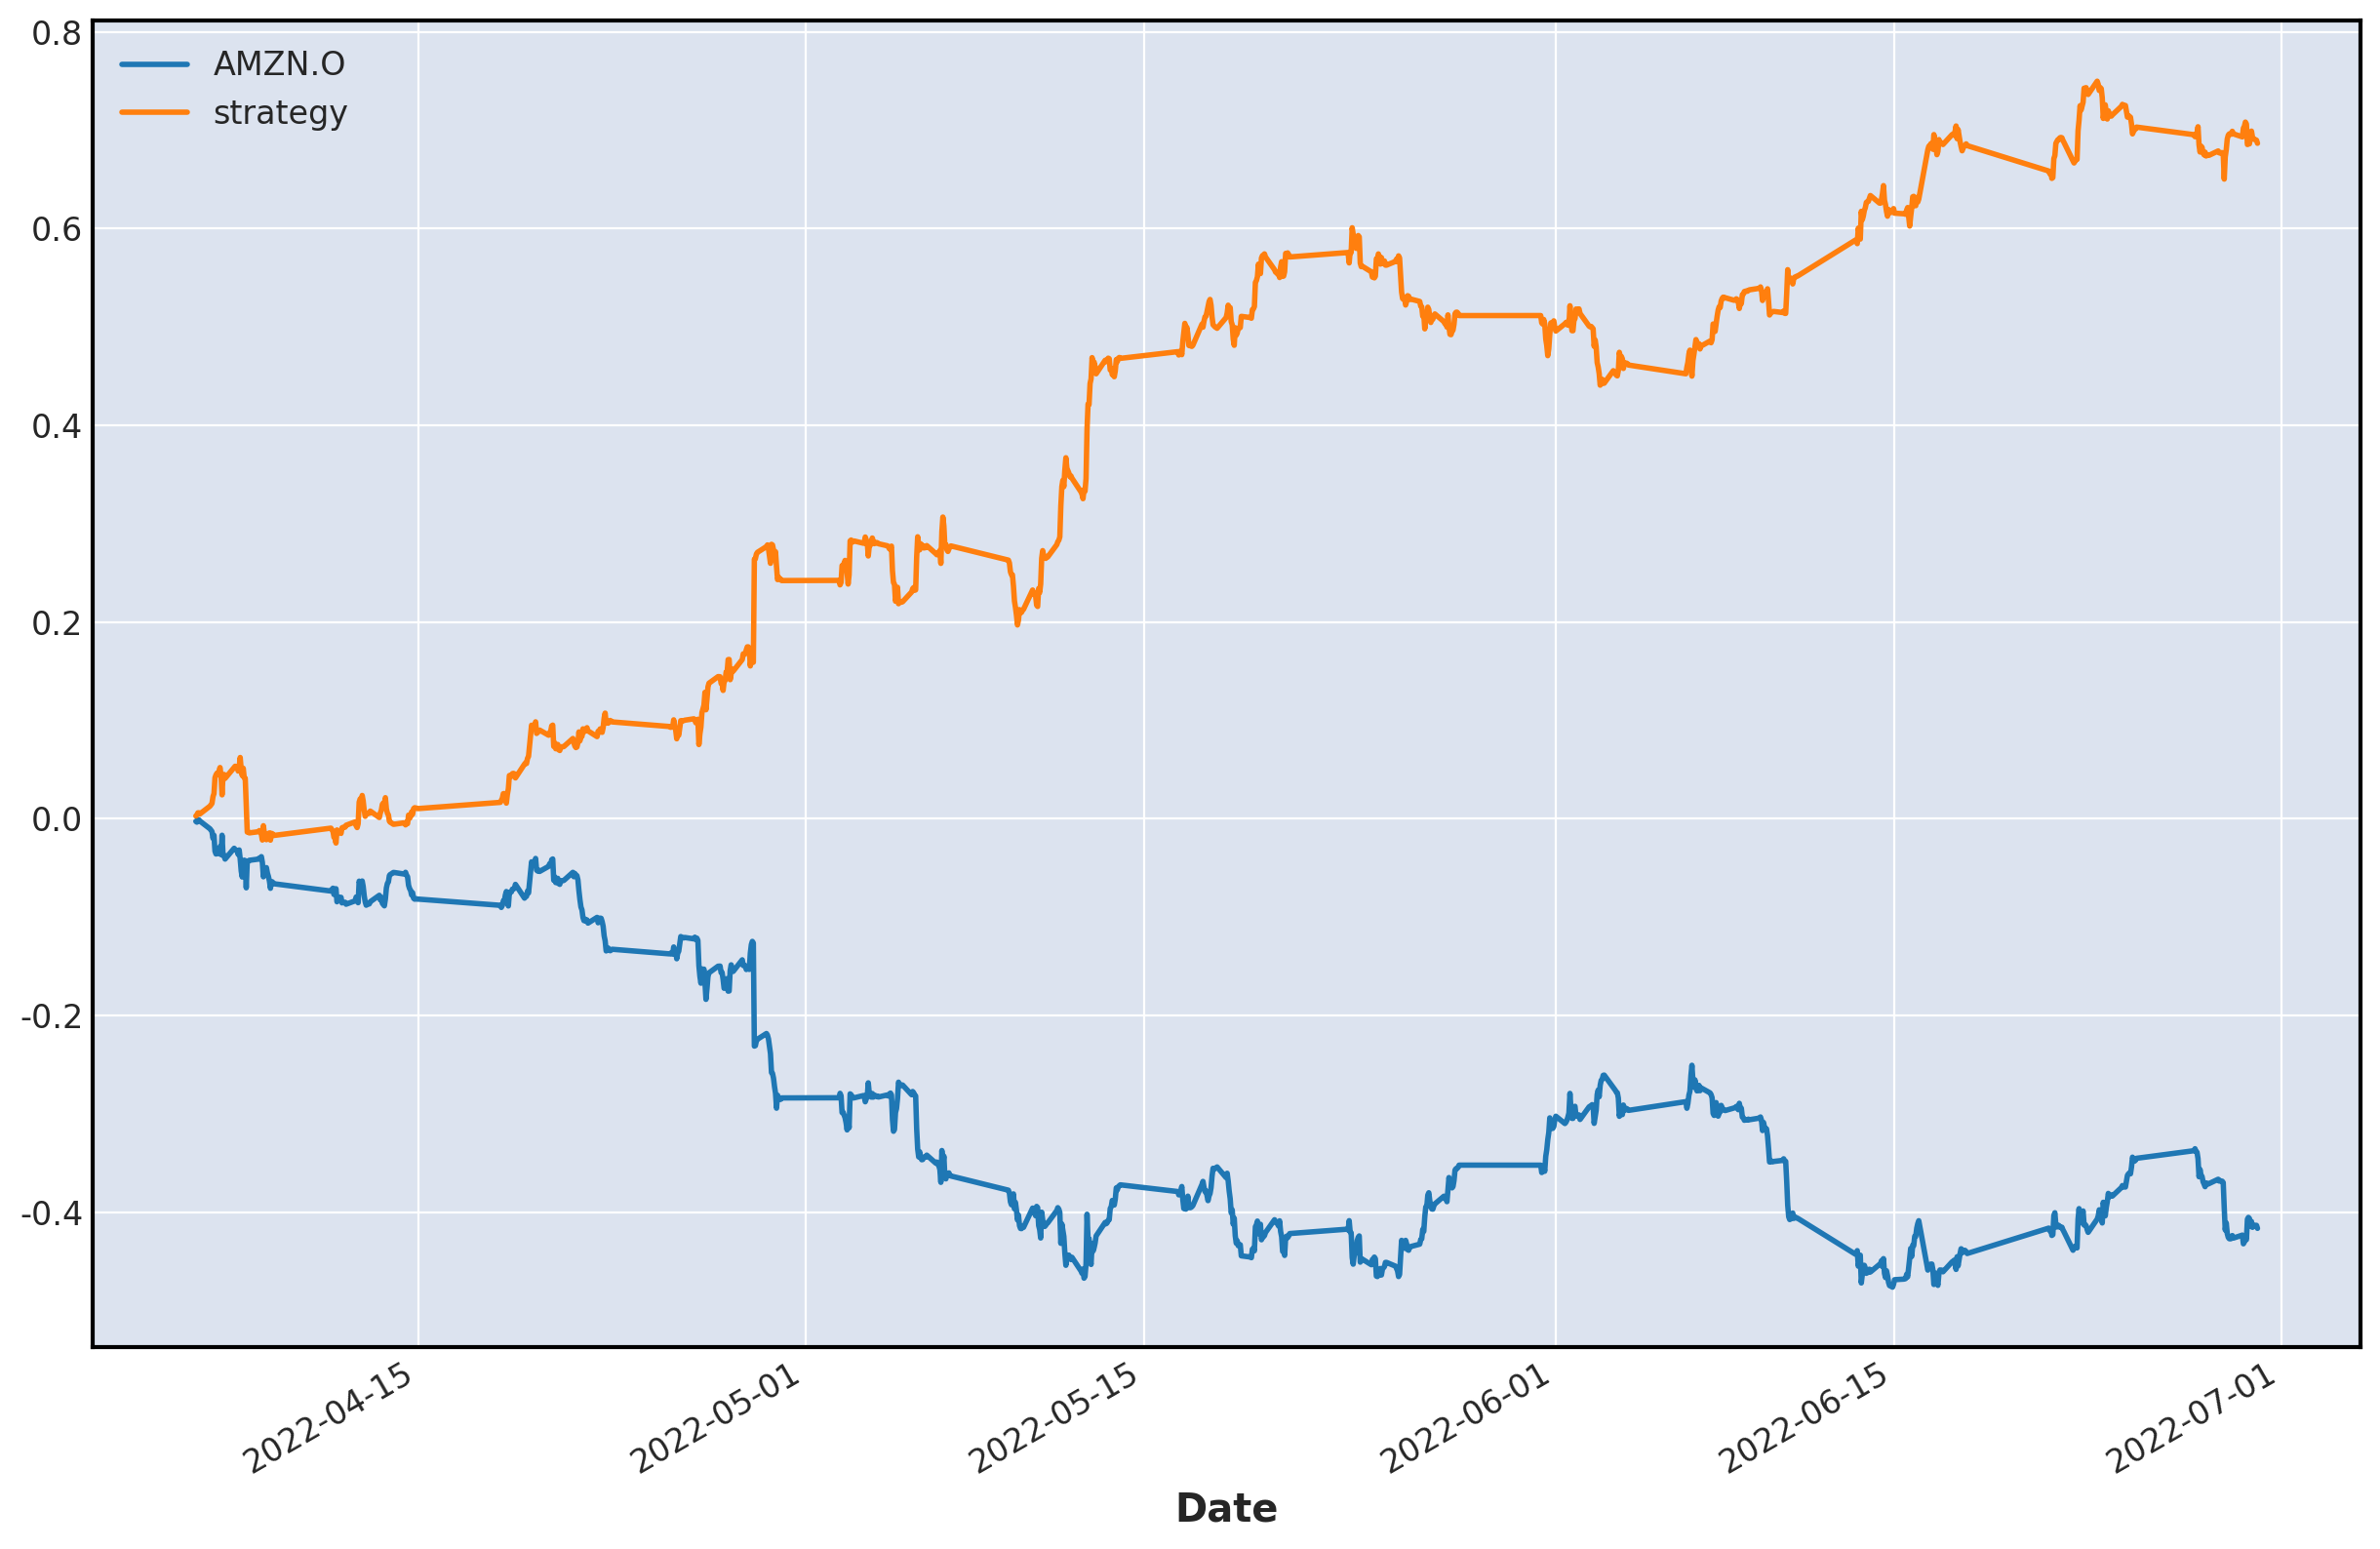

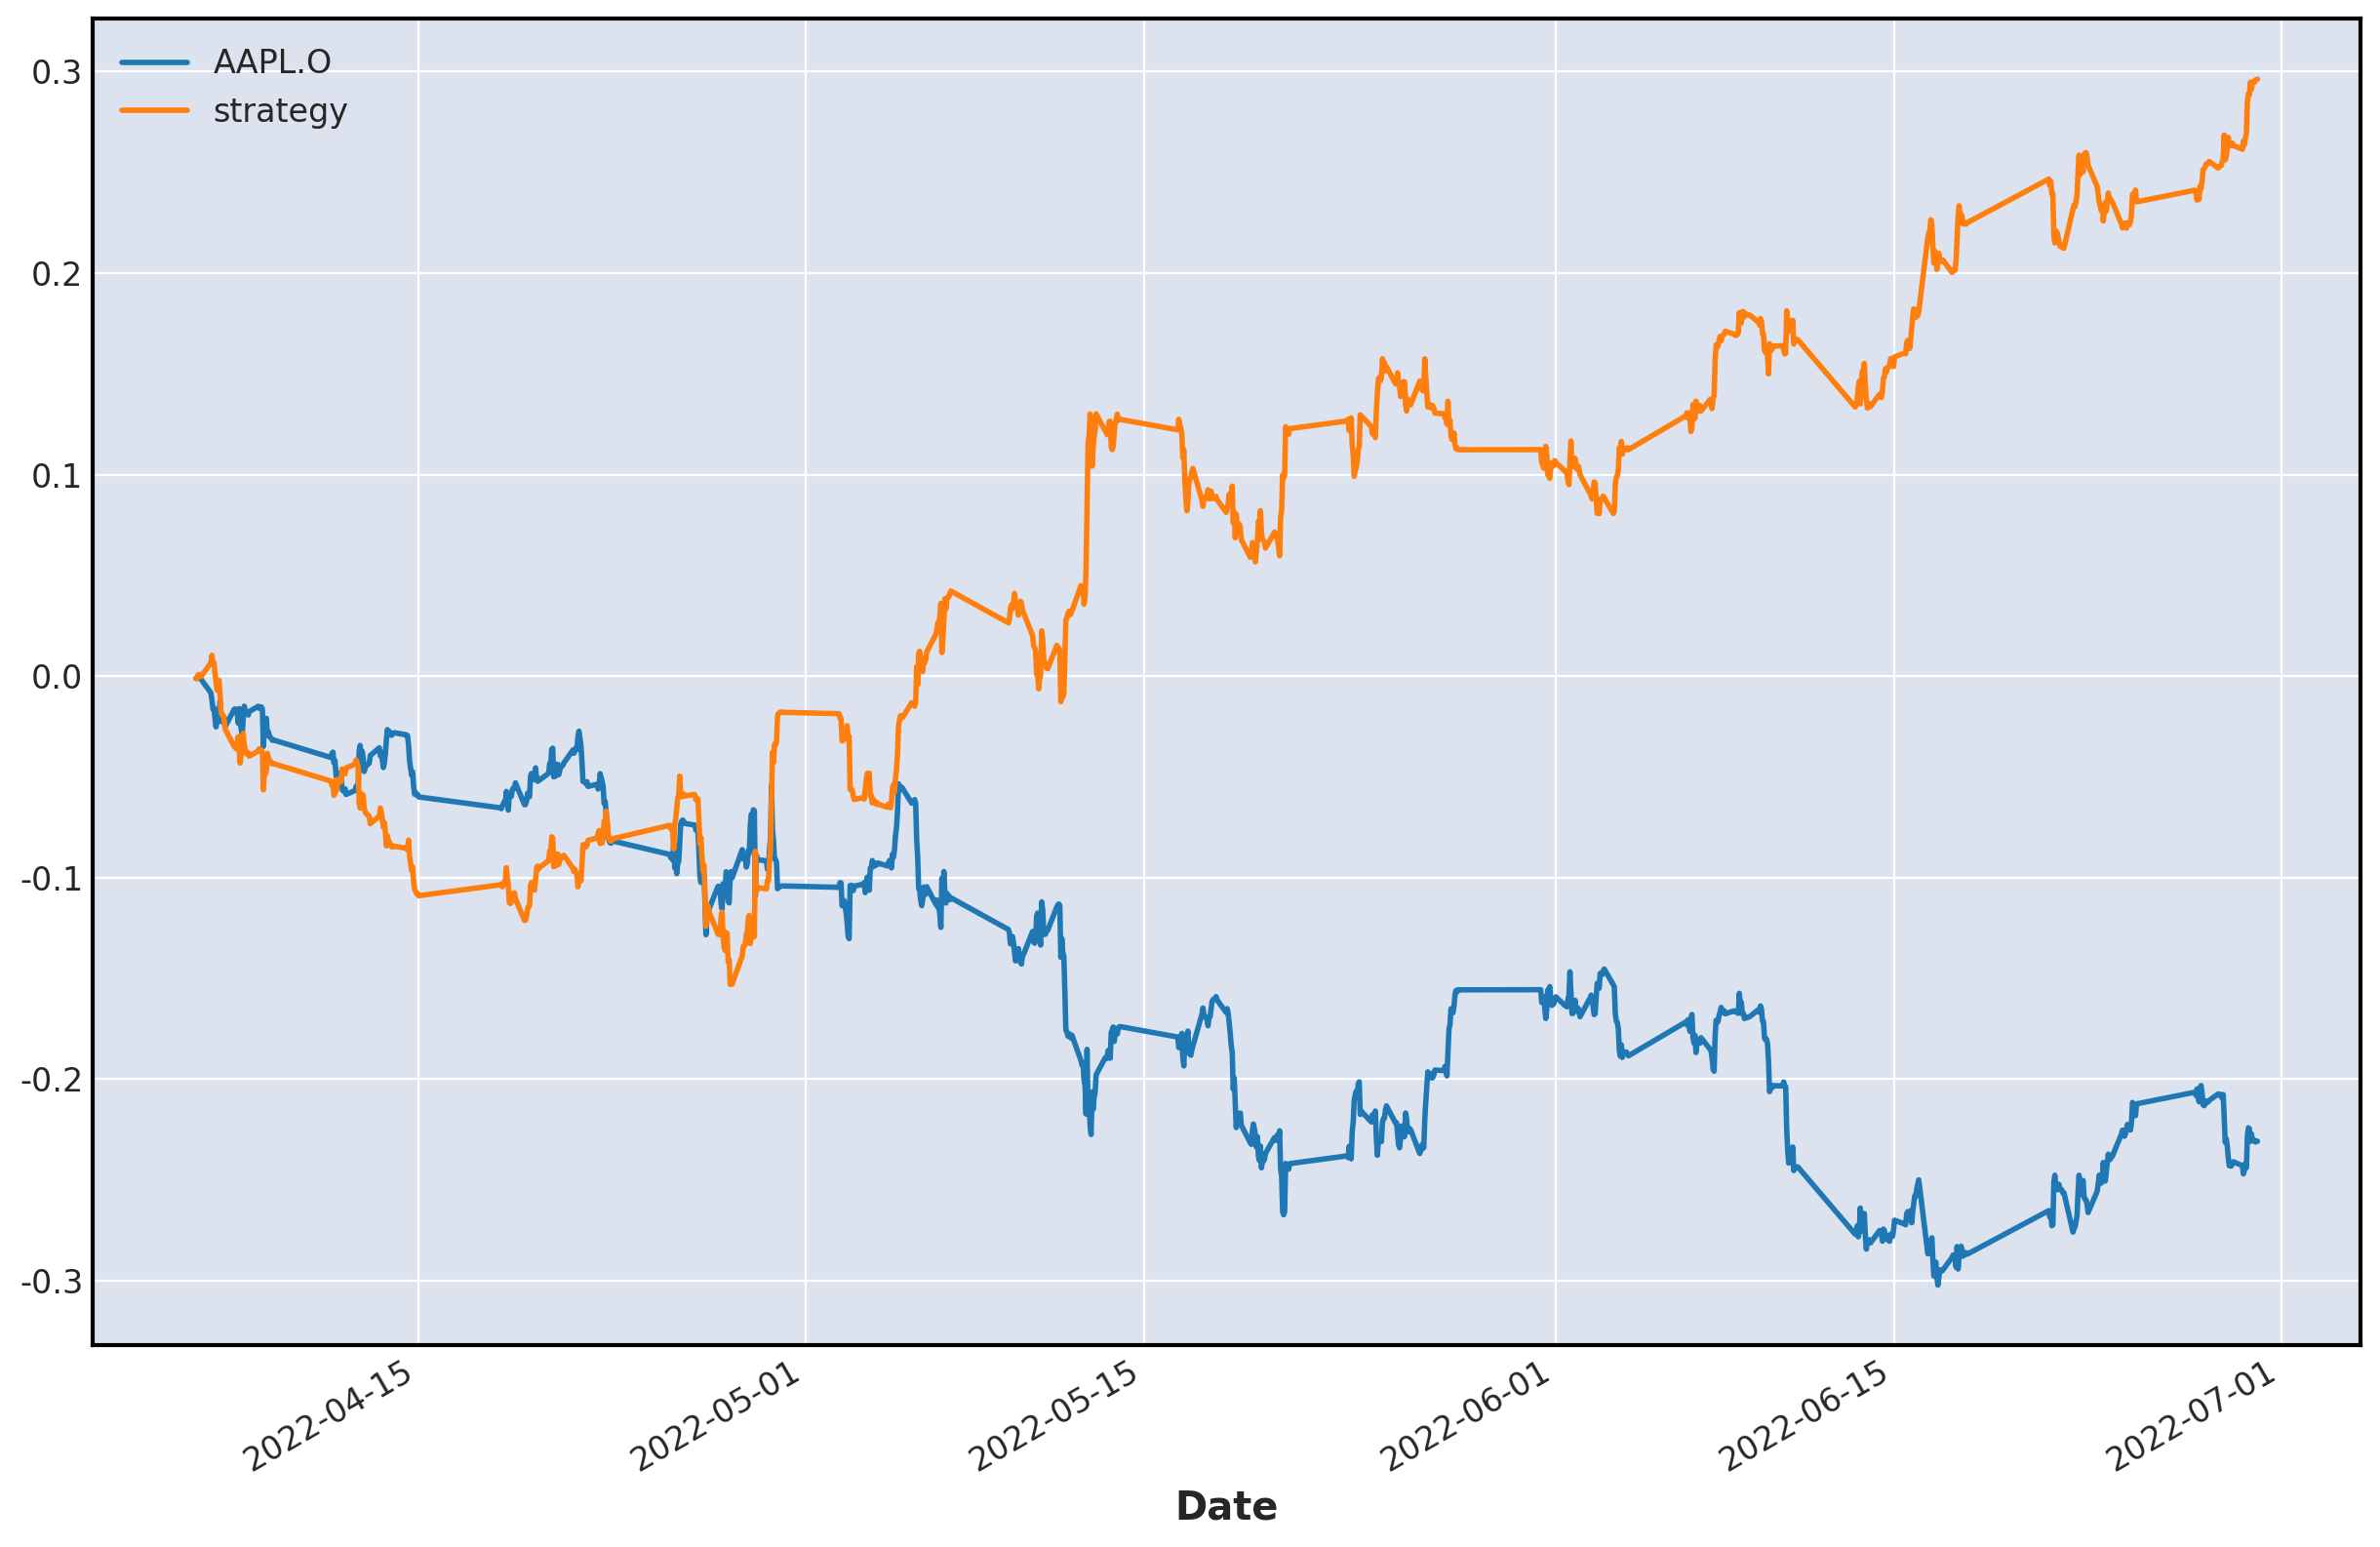

In [29]:
for ric in rics:
    res[ric][[ric, 'strategy']].cumsum().astype(float).plot(figsize=(15,10))

## Further Resources

### Refinitiv Developer Community

* [Articles](https://developers.refinitiv.com/en/article-catalog) 
* [Use Cases](https://developers.refinitiv.com/en/use-cases-catalog)
* [Videos](https://developers.refinitiv.com/en/video-catalog)
* [APIs](https://developers.refinitiv.com/en/api-catalog?q1=devportal%3Acapability/recommended&x1=api_capabilities)
* [Q&A Forums](https://community.developers.refinitiv.com/index.html?)
* [Python Quants Tutorial Series - 13 Videos wth Notebooks](https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/tutorials#python-quants-video-tutorial-series)

For Content Navigation in Eikon / Workspace - please use the Data Item Browser Application: Type 'DIB' into Search Bar.

### For Python/ AI/ML / Quant Finance / Algo Trading training

* [The Python Quants](https://home.tpq.io/)

    * Books:
    * [Python for Algorithmic Trading](https://www.oreilly.com/library/view/python-for-algorithmic/9781492053347/)
    * [Artifical Intelligence in Finance](https://www.oreilly.com/library/view/artificial-intelligence-in/9781492055426/)
    * [Python for Finance 2nd Ed.](https://www.oreilly.com/library/view/python-for-finance/9781492024323/)

### For Technical Analysis training & consultancy - Trevor Neil

* [The Beta Group](http://betagroup.co.uk/)

### Meetup Groups

* [Python Quants Meetup Group (Virtual/Live)](https://www.meetup.com/python-for-quant-finance-london/)
